<h1>Сборный проект №1: анализ игровой индустрии по данным до 2017 года.</h1>

**Описание проекта:** <br><br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br><br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

**Описание данных:**
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h2>1. Загрузка данных и изучение общей информации.</h2>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import missingno as msno

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**После загрузки данных:** 
- DF games имеет 11 столбцов и 16715 строк с пропусками;
- запись названия столбцов не в змеином стиле;
- неправильный тип данных в столбцах.

<h2>2. Предобработка данных.</h2>

<h3>2.1 Приведение названия столбцов к нижнему регистру.</h3>

In [7]:
games.columns = games.columns.str.lower()
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Все названвания столбоцов приведены к нижнему регистру.

<h3>2.2 Обработка пропусков.</h3>

In [8]:
print('Количество пропусков:\n')
print(games.isnull().sum().sort_values())

Количество пропусков:

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64


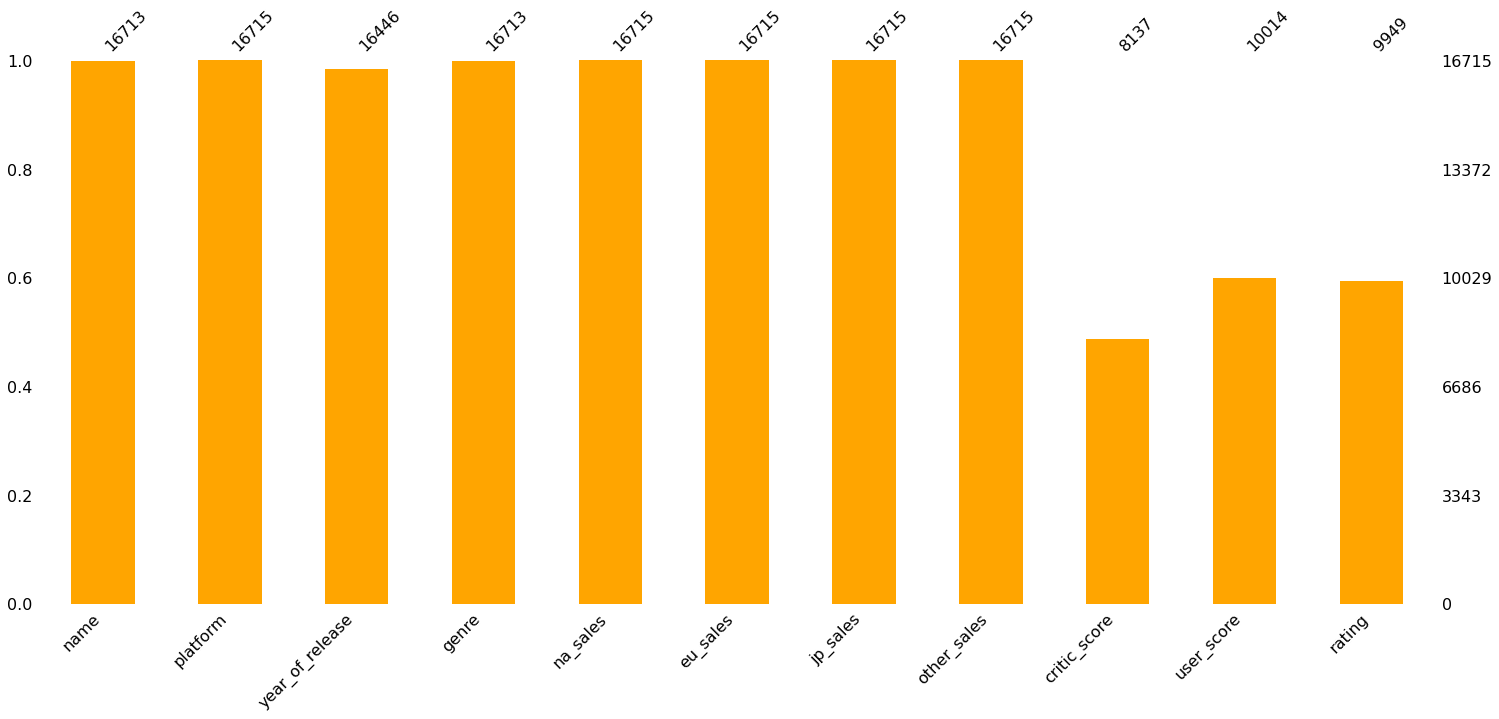

In [9]:
# Визуализации пропусков
msno.bar(games, color='orange');

**Обработка столбца 'name'**

In [10]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
games = games.dropna(subset = ['name'])

Удаление 2-х строк с неизвестными играми неизвестного жанра, без оценок и рейтинга.

**Обработка столбца 'year_of_release'**

In [12]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
percent_yor_miss = ((games['year_of_release'].isna().count() 
                   - games['year_of_release'].dropna().count()) 
                  / games['year_of_release'].isna().count()) * 100
print(f'Процент пропусков в столбце year_of_release от общего количества данных:', f'{percent_yor_miss:.2f}%')

Процент пропусков в столбце year_of_release от общего количества данных: 1.61%


In [14]:
games = games.dropna(subset = ['year_of_release'])

# games['year_of_release'] = np.floor(pd.to_numeric(games['year_of_release'], errors='coerce')).astype('Int64') 
# замена формата без удаления пропусков

Удаление 1.61% (269 строк) пропущенных значений не окажет существенного влияния на точность анализа.

**Обработка столбца 'user_score'**

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
print('Значений tbd (to be determined = будет определено):', games['user_score'].value_counts()['tbd'])

Значений tbd (to be determined = будет определено): 2376


In [17]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

При преобразовании типа данных на float значение tbd, вызывает ошибку, заменим его на nan.

In [18]:
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Большое количество пропусков в оценках пользователей. Удаление или замена пропущенных значений средними или медианными значениями может привести к искажению результатов и проведению некорректного анализа. Оставим пропуски.

**Обработка столбца 'rating'**

In [19]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно википедии рейтинг 'K-A' более не используется: "E" ("Everyone") — "Для всех": Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"). Заменим "K-A" на "E", для актуализации данных.

In [20]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

Заполним пропуски значением 'no_rating'.

In [21]:
games['rating'] = games['rating'].fillna('no_rating')

**Обработка столбца 'critic_score'**

In [22]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [23]:
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating


Большое количество пропусков в оценках критиков. Удаление или замена пропущенных значений как и в случае с оценками пользователей может привести к искажению результатов и проведению некорректного анализа. Оставив пропуски без изменения мы сохраним ценность данных и избежим искажения реальной картины.

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


После обработки пропусков количество записей в DF сократилось с **16715** до **16444**. Удалено **271** строки. Пропуски в столбце **rating** заменены значение **no_rating**. Пропуски в столбцах critic_score и user_score оставил без изменений. В столбце user_score строки со значением **tbd заменены на nan**.

<h3>2.3 Преобразование типа данных.</h3>

In [25]:
games['year_of_release'] = games['year_of_release'].astype('int32')
# Замена на целочисленное представление года - год должен отражать конкретный календарный год, что более точно представляется в виде целого числа.

In [26]:
games['user_score'] = games['user_score'].astype(float)
# Замена типа с object на float для проведения математических и иных операций.

games['user_score'] = games['user_score'] * 10
# Изменение формата шкалы оценки пользователей с 10 на 100, для возможности сравнения с оценками критиков.

<h3>2.4 Создание нового столбца 'ww_sales' с суммарными продажами во всех регионах.</h3>

In [27]:
# games['ww_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games['ww_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

index_other_sales = games.columns.get_loc('other_sales')
games.insert(index_other_sales + 1, 'ww_sales', games.pop('ww_sales'))
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,ww_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,no_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,no_rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,84.0,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,no_rating


In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   ww_sales         16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Создан новый столбец **ww_sales** с суммарными продажами во всех регионах. В столбце 16444 строк, без пропусков, тип данных столбца float64.

**По итогу предобработки даннных DF games:** 
- названия всех столбцов DF games приведены к нижнему регистру;
- обработаны пропуски и некорректные значения столбцов `name`, `year_of_release`, `user_score`,	`rating`;
- произведено изменение типа данных для столбцов с неоптимальным типом - `year_of_release` и `user_score`;
- построен новый столбец `ww_sales` с суммарными продажами во всех регионах.

<h2>3. Исследовательский анализ данных.</h2>

<h3>3.1 Количество выпущенных игр по годам.</h3>

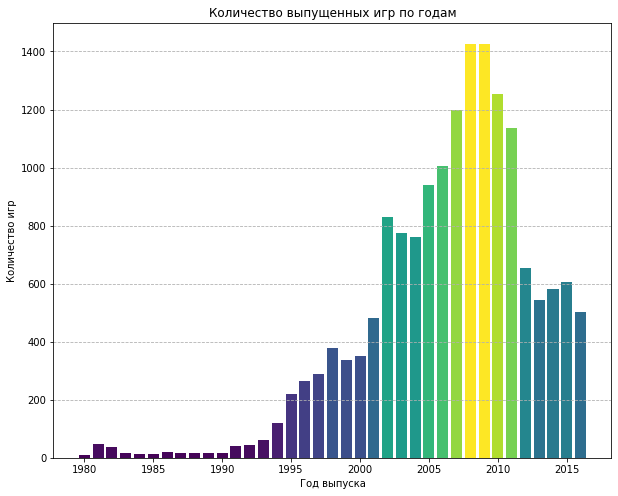

In [29]:
# Подсчет количества игр по годам
games_per_year = games['year_of_release'].value_counts().sort_index()

colors = plt.cm.viridis(games_per_year / float(max(games_per_year)))

plt.figure(figsize=(10, 8))
plt.bar(games_per_year.index, games_per_year.values, color=colors)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')
plt.grid(axis='y', linestyle='--')
plt.show()

In [30]:
games_per_year = games_per_year.sort_values(ascending=False).reset_index()
games_per_year.columns = ['Год выпуска', 'Количество игр']
total_games = games_per_year['Количество игр'].sum()
games_per_year['Часть %'] = (games_per_year['Количество игр'] / total_games).round(3) * 100

games_per_year

,Год выпуска,Количество игр,Часть %
0,2008,1427,8.7
1,2009,1426,8.7
2,2010,1255,7.6
3,2007,1197,7.3
4,2011,1136,6.9
5,2006,1006,6.1
6,2005,939,5.7
7,2002,829,5.0
8,2003,775,4.7
9,2004,762,4.6


Начиная с 1994 года начался постоянный рост выпуска игр, который продлился до 2010, достигнув своего пика в районе 2008-2009 годов. После 2011 года, согласно данным, выпуск игр соркатился практически в 2 раза. Возможно, это связано с тем, что в это время произошел переход на следующее поколение игровых консолей, таких как PlayStation 4 и Xbox One. Разработка игр для новых платформ требует больше времени и ресурсов. А так же, скорее всего, повлияло стремительное развитие мобильного гейминга которое началось в первой половине 2010-х. Данные до 1994 не важны в анализе, т.к. суммарный процент выпущенных игр в период с 1980 по 1993 год составляет всего 2.24%.

<h3>3.2 Продажи по платформам.</h3>

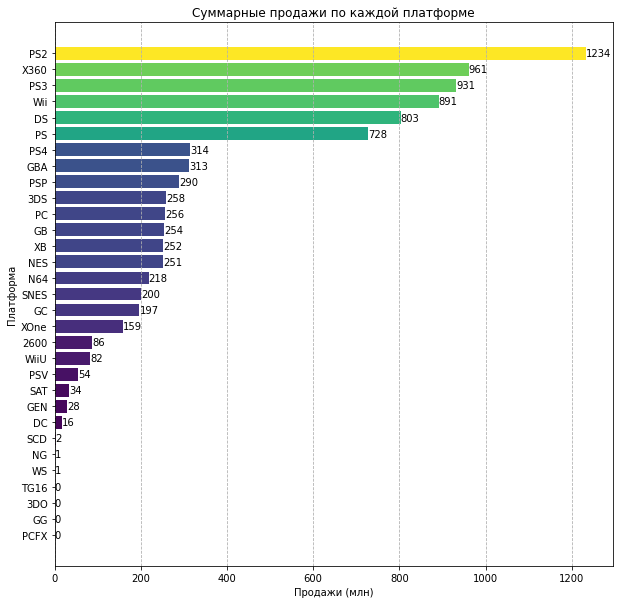

In [31]:
# Создание суммарных продаж по платформам
platform_sales = games.groupby('platform')['ww_sales'].sum().sort_values()

colors = plt.cm.viridis(platform_sales / float(max(platform_sales)))

# Построение горизонтальной столбчатой диаграммы с подписями
plt.figure(figsize=(10, 10))
bars = plt.barh(platform_sales.index, platform_sales.values, color=colors) 
plt.xlabel('Продажи (млн)')
plt.ylabel('Платформа')
plt.title('Суммарные продажи по каждой платформе')

# Добавление подписей к столбцам
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width()), 
             va='center', ha='left', fontsize=10, color='black')

plt.grid(axis='x', linestyle='--')
plt.show()

Из графика видно, что наибольшее число продаж во всём мире было на платформе **PlayStation 2 - 1234 млн.** В 6-ке лидеров так же платформы: Xbox 360 (961 млн), PlayStation 3 (931 млн), Nintendo Wii (891 млн), Nintendo DS (803 млн), PlayStation 1 (728 млн).

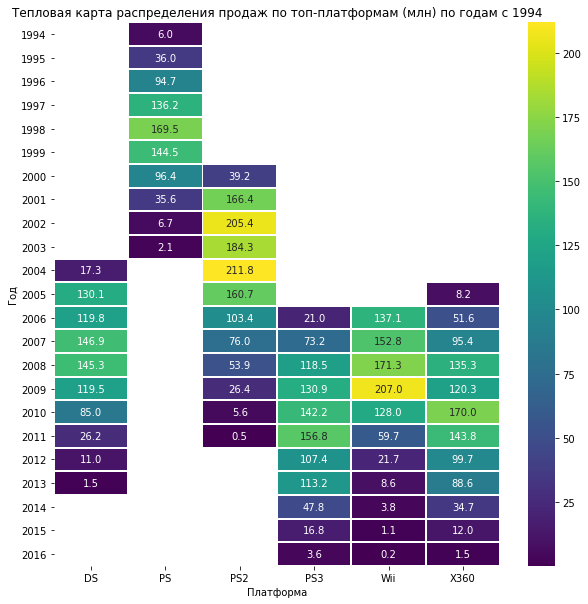

In [32]:
# Выбор топ-6 платформ с наибольшими продажами
top_platforms = platform_sales.sort_values(ascending=False).head(6)

# Фильтрация данных для топ-платформ
top_platforms_data = games[games['platform'].isin(top_platforms.index)]

# Фильтрация данных по играм с годом выпуска >= 1994
top_platforms_data = top_platforms_data[top_platforms_data['year_of_release'] >= 1994]

# Создание сводной таблицы для тепловой карты
top_heatmap = top_platforms_data.pivot_table(index='platform', columns='year_of_release', values='ww_sales', aggfunc='sum')

plt.figure(figsize=(10, 10))
sns.heatmap(top_heatmap.T, cmap="viridis", annot=True, fmt=".1f", linewidths=1)
plt.title('Тепловая карта распределения продаж по топ-платформам (млн) по годам с 1994')
plt.xlabel('Платформа')
plt.ylabel('Год')
plt.show()

Из тепловой карты распределениея продаж по топ-платформам в период 1994-2016 годов, можно сделать следующие **выводы**:
- **Цикличность**: на рынке видеоигр наблюдается цикличность популярности платформ. Платформы обычно проходят через периоды роста, достижения пиковых продаж, а затем снижения интереса со стороны потребителей.
- **Смена поколений**: с развитием технологий и появлением новых платформ рынок видеоигр постоянно меняется. Новые платформы вытесняют устаревающие, вызывая изменения в продажах.

In [33]:
# Определение срока появления новых и исчезновения старых платформ
platform_lifecycle = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifecycle['platform_lifetime'] = platform_lifecycle['max'] - platform_lifecycle['min']
avg_lifetime = platform_lifecycle['platform_lifetime'].mean()
print('Средний срок жизни платформы: {:.2f} лет'.format(avg_lifetime))

Средний срок жизни платформы: 7.61 лет


In [34]:
platform_lifecycle['platform_lifetime'].describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: platform_lifetime, dtype: float64

**Средний срок жизни платформы 7.61 лет**, медианный 6 лет, максимальная продолжительность жизни платформы 31 - год (PC).

<h3>3.3 Выбор данных за актуальный период. Какие платформы лидируют по продажам, растут или падают?</h3>

Для выбора наиболее актуального периода для анализа, возьмём год выхода самых популярных консолей восьмого поколения (2011-2019) (данные из википедии). Это **PlayStation 4** (2013 г.в.) и **Xbox One** (2013 г.в.). Возьмём данные за 2014 - 2016 годы, т.к. 2017 год будет в середине жизненного цикла этих консолей.

In [35]:
# Фильтрация данных только для игр с выпуском после 2014 года
games_2014 = games[games['year_of_release'] >= 2014]
print(games.info())
print()
print(games_2014.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   ww_sales         16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: float64(7), int32(1), object(4)
memory usage: 2.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --

После фильтрации по актуальному периоду (с 2014 года по 2016 год) количество записей в DF сократилось с 16444 до 1689.

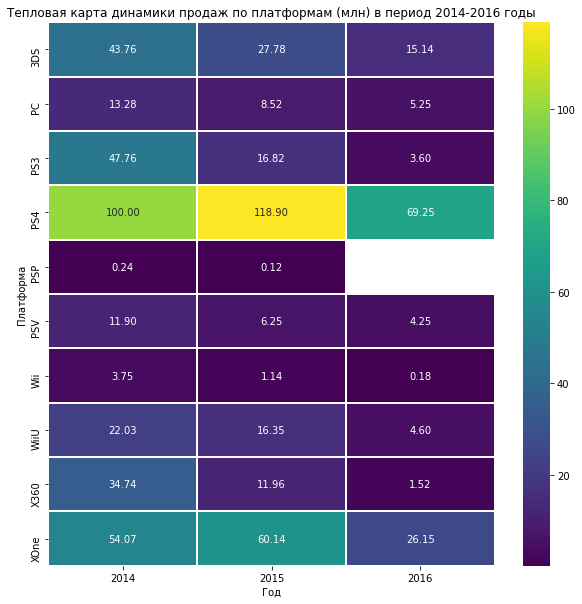

Платформы, лидирующие по продажам: 

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: ww_sales, dtype: float64

Потенциально прибыльные платформы: 

platform
PS4     288.15
XOne    140.36
3DS      86.68
Name: ww_sales, dtype: float64


In [36]:
# Группировка данных по платформам и суммарным продажам в период с 2014 по 2016 год.
platform_progression = games_2014.groupby(['platform', 'year_of_release'])['ww_sales'].sum().reset_index().pivot(
    index='platform', columns='year_of_release', values='ww_sales')

plt.figure(figsize=(10, 10))
sns.heatmap(platform_progression, cmap="viridis", annot=True, fmt=".2f", linewidths=1)
plt.title('Тепловая карта динамики продаж по платформам (млн) в период 2014-2016 годы')
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.show()

# Определение платформ, лидирующих по продажам и выбор потенциально прибыльных
platform_sales_relevant = games_2014.groupby('platform')['ww_sales'].sum().sort_values(ascending=False)

# Топ-5 платформ по продажам
top_platforms_sales = platform_sales_relevant.head(5)

# Топ-3 потенциально прибыльных платформ
profitable_platforms = platform_sales_relevant.head(3)  

# Вывод результатов
print('Платформы, лидирующие по продажам: \n')
print(top_platforms_sales)

print('\nПотенциально прибыльные платформы: \n')
print(profitable_platforms)

По данным тепловой карты можно сделать вывод, что количество продаж на всех актуальных платформах имеет тенденцию к снижению на 2016 год. Возможно продолжится и в 2017 году. Потенциально прибильными платформами можно назвать **PlayStation 4 - 288.15 млн.** продаж, **Xbox One - 140.36 млн.** и **Nintendo 3DS - 86.68 млн.** продаж соответственно. Эти платформы на 2017 год будут в середине своего жизненного цикла.

<h3>3.4 Построение boxplot по глобальным продажам игр в разбивке по платформам.</h3>

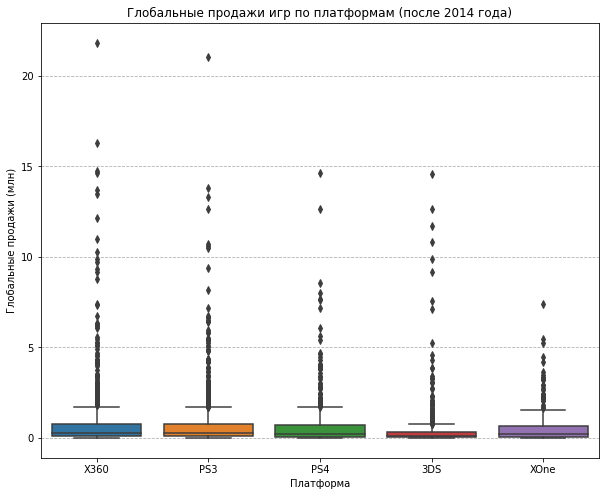

In [37]:
# Фильтрация данных только для игр с выпуском после 2014 года
actual_games_filtered = games_2014[['platform', 'ww_sales', 'year_of_release']]
actual_games_filtered = games[games['platform'].isin(top_platforms_sales.index)]


# Построение "ящика с усами" по глобальным продажам игр с 2014 года в разбивке по платформам
plt.figure(figsize=(10, 8))
sns.boxplot(x='platform', y='ww_sales', data=actual_games_filtered)
plt.title('Глобальные продажи игр по платформам (после 2014 года)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(axis='y', linestyle='--')
plt.show()

На диаграмме размаха присутствуют выбросы почти на всех платформах. Особенно выделяются  **PlayStation 4** и **Nintendo 3DS** выбросами в районе 15 миллионов и 12 миллионов. Построим диаграмму без выбросов.

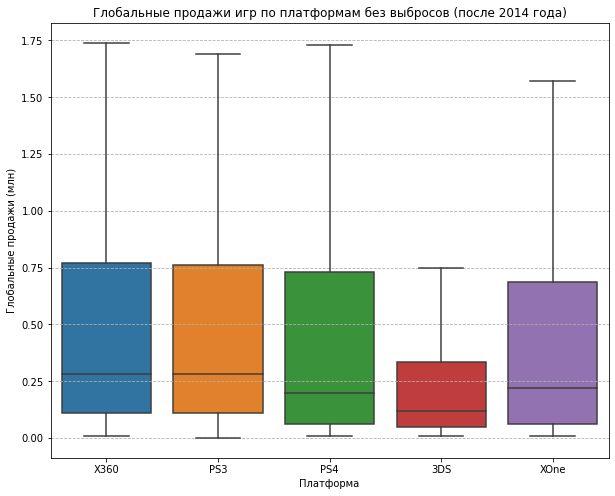

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='platform', y='ww_sales', data=actual_games_filtered, showfliers=False)
plt.title('Глобальные продажи игр по платформам без выбросов (после 2014 года)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(axis='y', linestyle='--')
plt.show()

- Самая крупная медиана продаж у платформы **Xbox One**, в районе 200 тыс. продаж, что может свидетельствовать о стабильности спроса на игры для данной платформы.
- **PlayStation 4** также имеет высокие значения медианы и третьего квартиля продаж, что свидетельствует о широкой популярности на рынке видеоигр.

<h3>3.5 Построение диаграммы рассеяния и расчет корреляции между отзывами пользователей, критиков и продажами для платформы Xbox One.</h3>

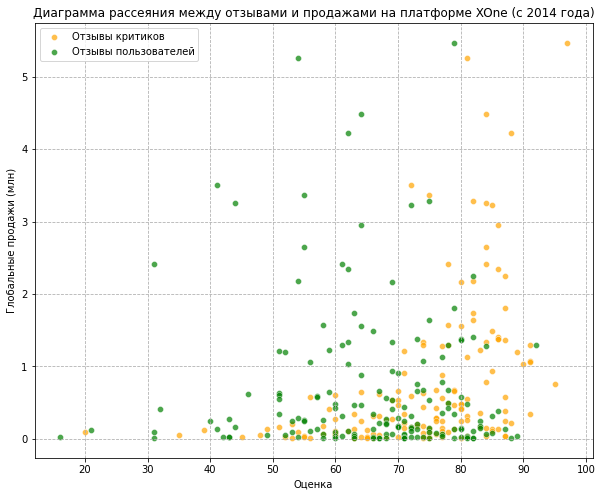

Корреляция между отзывами критиков, отзывами пользователей и глобальными продажами XOne:

              critic_score  user_score  ww_sales
critic_score      1.000000    0.440977  0.428677
user_score        0.440977    1.000000 -0.070384
ww_sales          0.428677   -0.070384  1.000000


In [39]:
# Фильтрация данных для платформы XOne и игр с выпуском после 2014 года
хоne = games_2014[(games_2014['platform'] == 'XOne')]

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 8))
sns.scatterplot(x='critic_score', y='ww_sales', data=хоne, color='orange', label='Отзывы критиков', alpha = .7)
sns.scatterplot(x='user_score', y='ww_sales', data=хоne, color='green', label='Отзывы пользователей', alpha = .7)
plt.title('Диаграмма рассеяния между отзывами и продажами на платформе XOne (с 2014 года)')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(linestyle='--')
plt.show()

# Расчет корреляции
correlation_хоne = хоne[['critic_score', 'user_score', 'ww_sales']].corr()
print('Корреляция между отзывами критиков, отзывами пользователей и глобальными продажами XOne:\n')
print(correlation_хоne)

Исходя из полученных данных можно сделать следующие **выводы**:

1. **Отзывы критиков** имеют **слабую положительную корреляцию** как с отзывами пользователей (0.441), так и с глобальными продажами **(0.429)**. Это может указывать на то, что игры, которые получают высокие оценки от критиков, чаще имеют и высокие продажи, но эта связь не является значительной.

2. **Отзывы пользователей не имеют корреляции с глобальными продажами (-0.070)**. Это означает, что оценки пользователей не так сильно влияют на объем продаж игр на платформе XOne.

Хотя и есть определенная связь между отзывами критиков, оценками пользователей и глобальными продажами игр на платформе XOne, влияние этих факторов на продажи неоднозначно и зависит от других аспектов рынка видеоигр.

<h3>3.6 Построение диаграммы рассеяния и расчет корреляции между отзывами пользователей, критиков и продажами для других платформ.</h3>

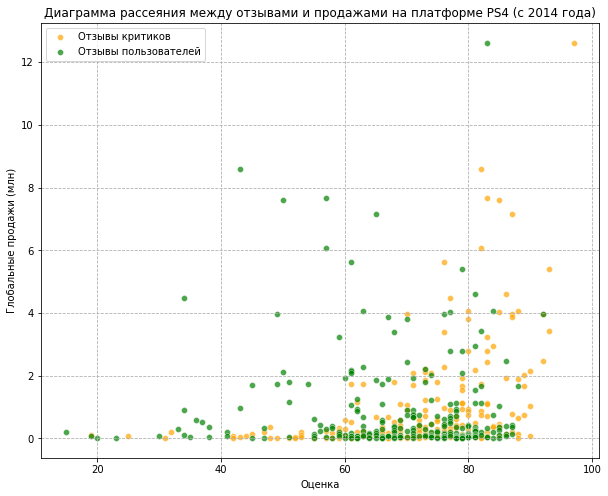

Корреляция между отзывами критиков, отзывами пользователей и глобальными продажами PS4:

              critic_score  user_score  ww_sales
critic_score      1.000000    0.546434  0.402661
user_score        0.546434    1.000000 -0.040132
ww_sales          0.402661   -0.040132  1.000000


In [40]:
ps4 = games_2014[(games_2014['platform'] == 'PS4')]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='critic_score', y='ww_sales', data=ps4, color='orange', label='Отзывы критиков', alpha = .7)
sns.scatterplot(x='user_score', y='ww_sales', data=ps4, color='green', label='Отзывы пользователей', alpha = .7)
plt.title('Диаграмма рассеяния между отзывами и продажами на платформе PS4 (с 2014 года)')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(linestyle='--')
plt.show()

correlation_ps4 = ps4[['critic_score', 'user_score', 'ww_sales']].corr()
print('Корреляция между отзывами критиков, отзывами пользователей и глобальными продажами PS4:\n')
print(correlation_ps4)

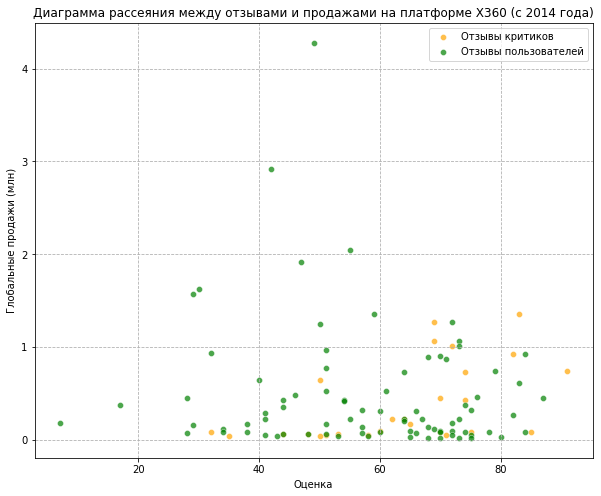

Корреляция между отзывами критиков, отзывами пользователей и глобальными продажами X360:

              critic_score  user_score  ww_sales
critic_score      1.000000    0.625309  0.525723
user_score        0.625309    1.000000 -0.138445
ww_sales          0.525723   -0.138445  1.000000


In [41]:
x360 = games_2014[(games_2014['platform'] == 'X360')]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='critic_score', y='ww_sales', data=x360, color='orange', label='Отзывы критиков', alpha = .7)
sns.scatterplot(x='user_score', y='ww_sales', data=x360, color='green', label='Отзывы пользователей', alpha = .7)
plt.title('Диаграмма рассеяния между отзывами и продажами на платформе X360 (с 2014 года)')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн)')
plt.legend()
plt.grid(linestyle='--')
plt.show()

correlation_x360 = x360[['critic_score', 'user_score', 'ww_sales']].corr()
print('Корреляция между отзывами критиков, отзывами пользователей и глобальными продажами X360:\n')
print(correlation_x360)

**Вывод:** Для других платформ, вывод о том что есть слабая положительная корреляция между отзывами критиков и глобальными продажами игр, и отсутсвием корреляции отзывов пользователей с продажами игр подтверждается.

<h3>3.7 Общее распределение игр по жанрам.</h3>

In [42]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

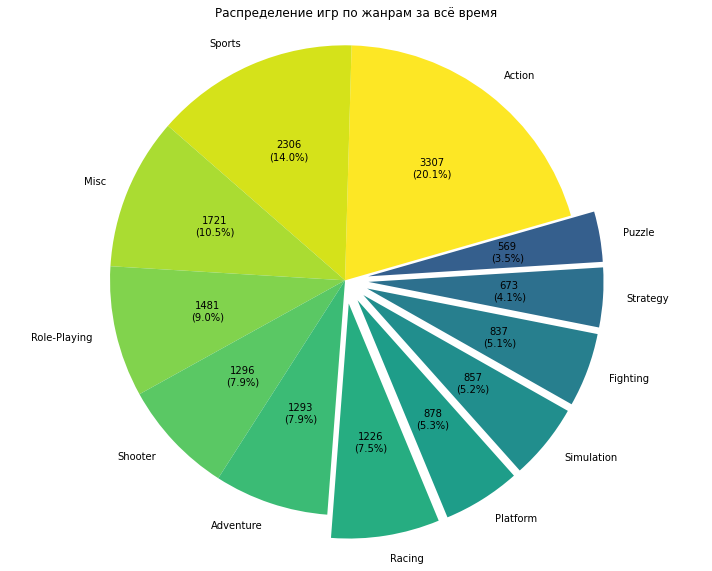

In [43]:
# Подсчет количества игр по каждому жанру
genre_count = games['genre'].value_counts()

# Взрыв :) для выделения мелких значений 
explode = [0.1 if count < genre_count.median() 
           else 0 for count in genre_count]

colors = plt.cm.viridis(np.linspace(1, 0.3, len(genre_count)))
plt.figure(figsize=(10, 8))
plt.pie(genre_count, labels=genre_count.index,
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(genre_count)/100, pct),
        startangle=16, colors=colors, explode=explode)
plt.axis('equal')
plt.title('Распределение игр по жанрам за всё время')
plt.tight_layout()
plt.show()

Самый популярный жанр из выборке за всё время - **Action (3307, 20.1% игр)**, на 2-ом месте игры **Sports** тематики **(2306, 14% игр)**, далее идут игры категорий Misc, Role-Playing, Shoter и Adventure. Посмотрим на актуальный период - с 2014 года.

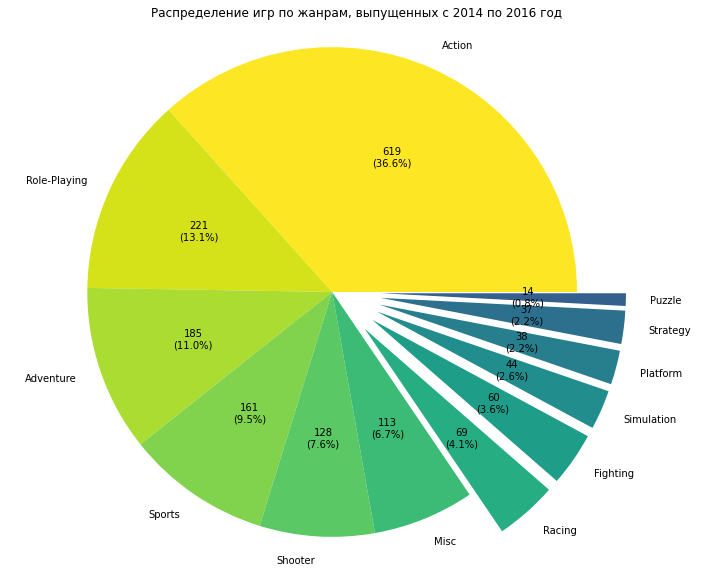

In [44]:
genre_count_2014 = games_2014['genre'].value_counts()

explode = [0.2 if count < genre_count_2014.median() 
           else 0 for count in genre_count_2014]

colors = plt.cm.viridis(np.linspace(1, 0.3, len(genre_count_2014)))
plt.figure(figsize=(10, 8))
plt.pie(genre_count_2014, labels=genre_count_2014.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(genre_count_2014)/100, pct), 
        startangle=0, colors=colors, explode=explode)
plt.axis('equal')
plt.title('Распределение игр по жанрам, выпущенных с 2014 по 2016 год')
plt.tight_layout()
plt.show()

Самый популярный жанр не изменился - это **Action**, но вырос процент игр этого жанра - 36.6%. Жанр **Role-Playing** стал более популярным, как и **Adventure**, подвинув игры Sports и Misc жанра.

**Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [45]:
# Группировка данных по жанрам для подсчета суммы продаж, количества игр и медианы продаж по каждому жанру для игр с 2014 года
genre_sales = games_2014.groupby('genre').agg({'ww_sales': 'sum', 'name': 'count'}).reset_index()
genre_sales['percent_sales'] = ((genre_sales['ww_sales'] / genre_sales['ww_sales'].sum()) * 100).round(2)
genre_sales['median_sales'] = games_2014.groupby('genre')['ww_sales'].median().values
genre_sales = genre_sales.sort_values(by='ww_sales', ascending=False).reset_index(drop=True)
genre_sales.columns = ['жанр', 'млн. продаж', 'игры', '% продаж','медиана продаж']

genre_sales

,жанр,млн. продаж,игры,% продаж,медиана продаж
0,Action,199.36,619,27.33,0.090
1,Shooter,170.94,128,23.43,0.515
2,Sports,109.48,161,15.01,0.180
3,Role-Playing,101.44,221,13.91,0.110
4,Misc,37.55,113,5.15,0.090
5,Fighting,28.22,60,3.87,0.125
6,Racing,27.52,69,3.77,0.090
7,Platform,18.09,38,2.48,0.140
8,Adventure,17.55,185,2.41,0.030
9,Simulation,13.13,44,1.80,0.100


**Вывод:**
- **Action** - лидер по общей сумме продаж с 27.33% (199.36 млн.), но медианные продажи составляют 0.090 млн.
- **Shooter** - занимает второе место по продажам с 23.43% (170.94 млн.) и имеет одну из самых высоких медианных продаж в 0.515 млн.
- **Sports** - на третьем месте по продажам, их доля составляет 15.01% (109.48 млн.), а медианные продажи 0.180 млн.

Можно сделать вывод, что жанры Action, Shooter, и Sports являются наиболее успешными с точки зрения общих объемов продаж, хотя медианные продажи варьируются, позволяя нам увидеть разнообразие успеха игр в каждом жанре.

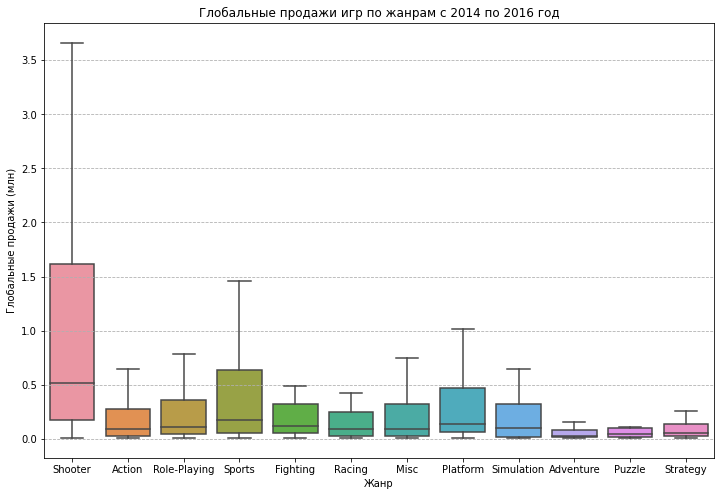

In [46]:
# Построение "ящика с усами" по глобальным продажам игр в разбивке по жанрам
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='ww_sales', data=games_2014, showfliers=False)
plt.title('Глобальные продажи игр по жанрам с 2014 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(axis='y', linestyle='--')
plt.show()

Из диаграммы размаха можно увидеть, что жанр **Shooter** показывает значительно более высокий уровень медианных продаж, чем другие жанры, делая его лидером в этом показателе. Следом за **Shooter** идет жанр **Sports**. В то же время, жанр **Action**, несмотря на то, что лидирует по общему количеству продаж, имеет более скромные показатели. Этот факт может указывать на то, что популярность жанра **Action** в основном обусловлена небольшим количеством игр-хитов с очень высокими продажами, в то время как остальные игры в этом жанре имеют менее выдающиеся результаты.

<h2>4. Портрет пользователя каждого региона.</h2>

<h3>4.1 Самые популярные платформы (топ-5) по продажам c 2014 по 2016 год.</h3>

In [47]:
# Самые популярные платформы в каждом регионе
top_platforms_na = games_2014.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = games_2014.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = games_2014.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

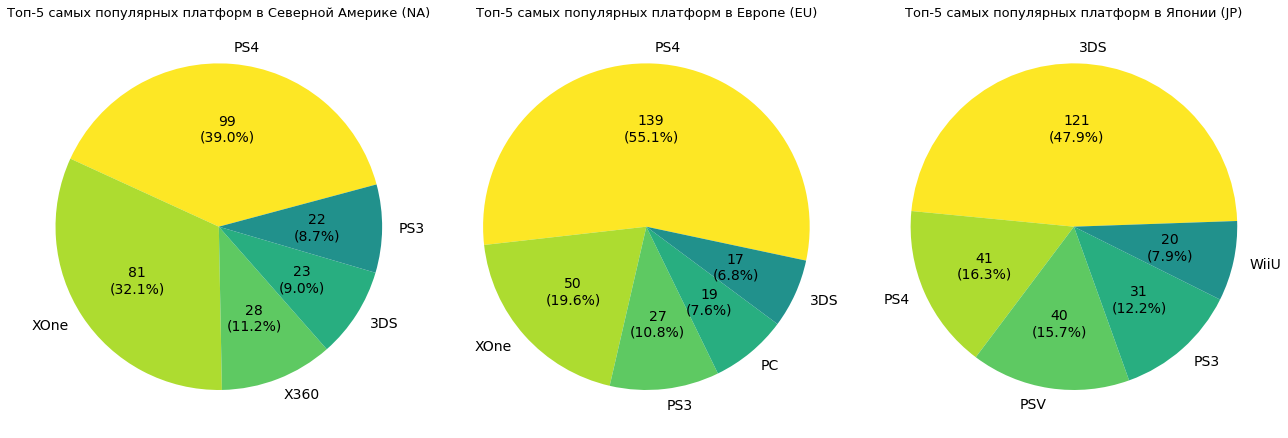

In [48]:
fig, axp = plt.subplots(1, 3, figsize=(18, 8)) 

# Самые популярные платформы в Северной Америке
colors = plt.cm.viridis(np.linspace(1, 0.5, len(top_platforms_na)))
axp[0].pie(top_platforms_na, labels=top_platforms_na.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(top_platforms_na)/100, pct), 
        startangle=15, colors=colors, textprops={'fontsize': 14})
axp[0].set_title('Топ-5 самых популярных платформ в Северной Америке (NA)', fontsize=13)

# Самые популярные платформы в Европе
colors = plt.cm.viridis(np.linspace(1, 0.5, len(top_platforms_eu)))
axp[1].pie(top_platforms_eu, labels=top_platforms_eu.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(top_platforms_na)/100, pct), 
        startangle=-12, colors=colors, textprops={'fontsize': 14})
axp[1].set_title('Топ-5 самых популярных платформ в Европе (EU)', fontsize=13)

# Самые популярные платформы в Японии
colors = plt.cm.viridis(np.linspace(1, 0.5, len(top_platforms_jp)))
axp[2].pie(top_platforms_jp, labels=top_platforms_jp.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(top_platforms_na)/100, pct), 
        startangle=2, colors=colors, textprops={'fontsize': 14})
axp[2].set_title('Топ-5 самых популярных платформ в Японии (JP)', fontsize=13)

plt.tight_layout()
plt.show()

In [49]:
# Создаем DF с данными по топ-платформам
top_platforms_ww = pd.DataFrame({
    'NA_sales': top_platforms_na,
    'EU_sales': top_platforms_eu,
    'JP_sales': top_platforms_jp
})

# Добавляем столбцы с долями
top_platforms_ww['NA_share'] = (top_platforms_ww['NA_sales'] / top_platforms_ww['NA_sales'].sum()).round(3) *100
top_platforms_ww['EU_share'] = (top_platforms_ww['EU_sales'] / top_platforms_ww['EU_sales'].sum()).round(3) *100
top_platforms_ww['JP_share'] = (top_platforms_ww['JP_sales'] / top_platforms_ww['JP_sales'].sum()).round(3) *100

# Упорядочиваем столбцы в нужном порядке и переименовываем
top_platforms_ww = top_platforms_ww[['NA_sales', 'NA_share', 'EU_sales', 'EU_share', 'JP_sales', 'JP_share']]
top_platforms_ww.columns = ['Северная Америка', 'доля в %', 'Европа', 'доля в %','Япония', 'доля в %']

top_platforms_ww.sort_values('Северная Америка', ascending=False)

,Северная Америка,доля в %,Европа,доля в %,Япония,доля в %
platform,,,,,,
PS4,98.61,39.0,130.04,55.1,15.02,16.3
XOne,81.27,32.1,46.25,19.6,NaN,NaN
X360,28.30,11.2,NaN,NaN,NaN,NaN
3DS,22.64,9.0,16.12,6.8,44.24,47.9
PS3,22.05,8.7,25.54,10.8,11.22,12.2
PC,NaN,NaN,17.97,7.6,NaN,NaN
PSV,NaN,NaN,NaN,NaN,14.54,15.7
WiiU,NaN,NaN,NaN,NaN,7.31,7.9


Различия в долях продаж по платформам обусловлены различиями в предпочтениях и разной популярности консолей в каждом регионе. Например, в **Северной Америке PS4 98.61 млн.(39.0%)** и **XOne 81.27 млн.(32.1%)** являются лидерами, в то время как в **Европе PS4 130.04 млн.(55.1%)** занимает более половины рынка, согласно выборке. В **Японии 3DS 44.24 млн.(47.9%)**, **PSV** и **WiiU** популярны благодаря игрокам склонным к мобильной игровой индустрии и традиционной популярности портативных консолей. Интересно, что **PC 17.97 млн.(7.6%)** игры пользуются популярностью в основном **Европе**, что отражено в высокой доле продаж в данном регионе.

<h3>4.2 Самые популярные жанры (топ-5) c 2014 по 2016 год.</h3>

In [50]:
# Самые популярные платформы в каждом регионе
top_genres_na = games_2014.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = games_2014.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = games_2014.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

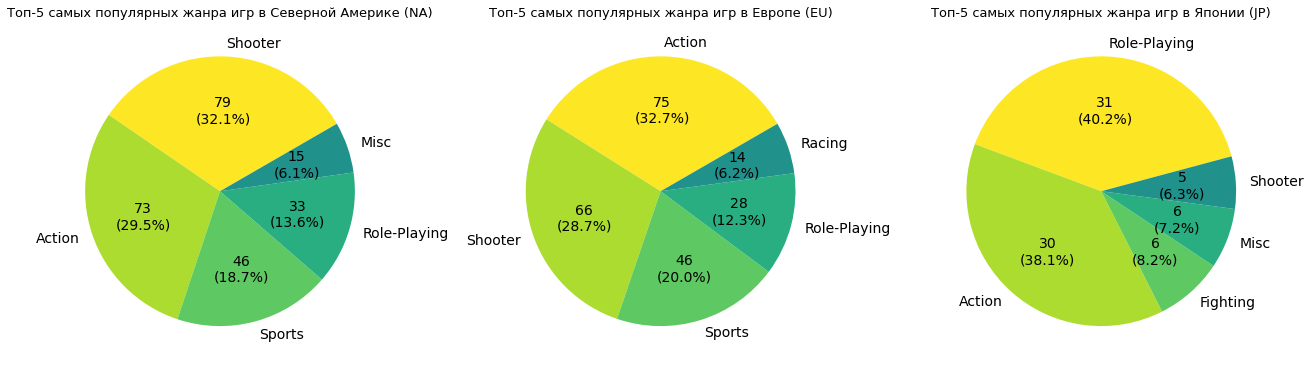

In [51]:
fig, axg = plt.subplots(1, 3, figsize=(18, 8)) 

# Самые популярны жанры игр в Северной Америке
colors = plt.cm.viridis(np.linspace(1, 0.5, len(top_genres_na)))
axg[0].pie(top_genres_na, labels=top_genres_na.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(top_genres_na)/100, pct), 
        startangle=30, colors=colors, textprops={'fontsize': 14})
axg[0].set_title('Топ-5 самых популярных жанра игр в Северной Америке (NA)', fontsize=13)

# Самые популярны жанры игр в Европе
colors = plt.cm.viridis(np.linspace(1, 0.5, len(top_genres_eu)))
axg[1].pie(top_genres_eu, labels=top_genres_eu.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(top_genres_eu)/100, pct), 
        startangle=30, colors=colors, textprops={'fontsize': 14})
axg[1].set_title('Топ-5 самых популярных жанра игр в Европе (EU)', fontsize=13)

# Самые популярны жанры игр в Японии
colors = plt.cm.viridis(np.linspace(1, 0.5, len(top_genres_jp)))
axg[2].pie(top_genres_jp, labels=top_genres_jp.index, 
        autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(top_genres_jp)/100, pct), 
        startangle=15, colors=colors, textprops={'fontsize': 14})
axg[2].set_title('Топ-5 самых популярных жанра игр в Японии (JP)', fontsize=13)

plt.tight_layout()
plt.show()

In [52]:
# Создаем DF с данными по топ-жанрам
top_genres_ww = pd.DataFrame({
    'NA_sales': top_genres_na,
    'EU_sales': top_genres_eu,
    'JP_sales': top_genres_jp
})

# Добавляем столбцы с долями
top_genres_ww['NA_share'] = (top_genres_ww['NA_sales'] / top_genres_ww['NA_sales'].sum()).round(3) *100
top_genres_ww['EU_share'] = (top_genres_ww['EU_sales'] / top_genres_ww['EU_sales'].sum()).round(3) *100
top_genres_ww['JP_share'] = (top_genres_ww['JP_sales'] / top_genres_ww['JP_sales'].sum()).round(3) *100

# Упорядочиваем столбцы в нужном порядке и переименовываем
top_genres_ww = top_genres_ww[['NA_sales', 'NA_share', 'EU_sales', 'EU_share', 'JP_sales', 'JP_share']]
top_genres_ww.columns = ['Северная Америка', 'доля в %', 'Европа', 'доля в %','Япония', 'доля в %']


top_genres_ww.sort_values('Северная Америка', ascending=False)

,Северная Америка,доля в %,Европа,доля в %,Япония,доля в %
genre,,,,,,
Shooter,79.02,32.1,65.52,28.7,4.87,6.3
Action,72.53,29.5,74.68,32.7,29.58,38.1
Sports,46.13,18.7,45.73,20.0,NaN,NaN
Role-Playing,33.47,13.6,28.17,12.3,31.16,40.2
Misc,15.05,6.1,NaN,NaN,5.61,7.2
Fighting,NaN,NaN,NaN,NaN,6.37,8.2
Racing,NaN,NaN,14.13,6.2,NaN,NaN


Разницу в популярных игровых жанрах в разных регионах можно объяснить культурными особенностями каждого региона. Например, в **Японии** жанры **Role-Playing 31.16 млн.(40.2%)** и **Fighting 6.37 млн.(8.2%)** популярнее, чем в Северной Америке и Европе, так как японская культура более ориентирована на аниме, мангу. В **Европе** предпочтения схожи с **Американскими**, поэтому жанры **Shooter**, **Action** и **Sports** занимают лидирующие позиции в обоих регионах.

<h3>4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.</h3>

In [53]:
# Самые популярные платформы в каждом регионе
esrb_na = games_2014.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = games_2014.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = games_2014.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

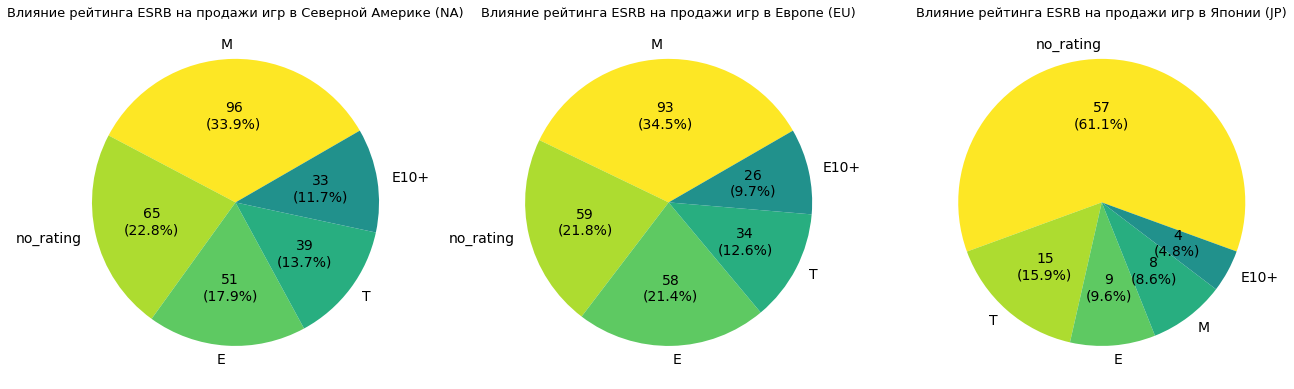

In [54]:
fig, axe = plt.subplots(1, 3, figsize=(18, 8)) 

# Влияние рейтинга ESRB на продажи игр в Северной Америке
colors = plt.cm.viridis(np.linspace(1, 0.5, len(esrb_na)))
axe[0].pie(esrb_na, labels=esrb_na.index, 
           autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(esrb_na)/100, pct), 
           startangle=30, colors=colors, textprops={'fontsize': 14})
axe[0].set_title('Влияние рейтинга ESRB на продажи игр в Северной Америке (NA)', fontsize=13)

# Влияние рейтинга ESRB на продажи игр в Европе
colors = plt.cm.viridis(np.linspace(1, 0.5, len(esrb_eu)))
axe[1].pie(esrb_eu, labels=esrb_eu.index, 
           autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(esrb_eu)/100, pct), 
           startangle=30, colors=colors, textprops={'fontsize': 14})
axe[1].set_title('Влияние рейтинга ESRB на продажи игр в Европе (EU)', fontsize=13)

# Влияние рейтинга ESRB на продажи игр в Японии
colors = plt.cm.viridis(np.linspace(1, 0.5, len(esrb_jp)))
axe[2].pie(esrb_jp, labels=esrb_jp.index, 
           autopct=lambda pct: '{:.0f}\n({:.1f}%)'.format(pct*sum(esrb_jp)/100, pct), 
           startangle=-20, colors=colors, textprops={'fontsize': 14})
axe[2].set_title('Влияние рейтинга ESRB на продажи игр в Японии (JP)', fontsize=13)

plt.tight_layout()
plt.show()

In [55]:
# Создаем DF с данными по топ-жанрам
esrb_ww = pd.DataFrame({
    'NA_sales': esrb_na,
    'EU_sales': esrb_eu,
    'JP_sales': esrb_jp
})

# Добавляем столбцы с долями
esrb_ww['NA_share'] = (esrb_ww['NA_sales'] / esrb_ww['NA_sales'].sum()).round(3) *100
esrb_ww['EU_share'] = (esrb_ww['EU_sales'] / esrb_ww['EU_sales'].sum()).round(3) *100
esrb_ww['JP_share'] = (esrb_ww['JP_sales'] / esrb_ww['JP_sales'].sum()).round(3) *100

# Упорядочиваем столбцы в нужном порядке и переименовываем
esrb_ww = esrb_ww[['NA_sales', 'NA_share', 'EU_sales', 'EU_share', 'JP_sales', 'JP_share']]
esrb_ww.columns = ['Северная Америка', 'доля в %', 'Европа', 'доля в %','Япония', 'доля в %']

esrb_ww.sort_values('Северная Америка', ascending=False)

,Северная Америка,доля в %,Европа,доля в %,Япония,доля в %
rating,,,,,,
M,96.42,33.9,93.44,34.5,8.01,8.6
no_rating,64.72,22.8,58.95,21.8,56.90,61.1
E,50.74,17.9,58.06,21.4,8.94,9.6
T,38.95,13.7,34.07,12.6,14.78,15.9
E10+,33.23,11.7,26.16,9.7,4.46,4.8


Из полученных данных по доле продаж видеоигр в разных регионах, можно сделать следующие выводы о том, как рейтинг ESRB влияет на продажи в отдельном регионе:

**Северная Америка**:
   - Рейтинг M (Mature) имеет самую высокую долю продаж 96.42 млн.(33.9%). Это указывает на то, что в Северной Америке игры с рейтингом "Mature" пользуются большим спросом.
   - Количество продаж игр без рейтинга (no_rating) довольно высоко - 64.72 млн.(22.8%). 
   - Рейтинги E (Everyone) и T (Teen) также имеют заметные доли продаж. 

**Европа**:
   - Аналогично Северной Америке, рейтинг M (Mature) имеет самую высокую долю продаж 93.44 млн.(34.5%) в Европе.
   - Рейтинг E (Everyone) также пользуется популярностью среди европейских игроков, даже больше чем в Северной Америке.
   - Неоцененные игры (no_rating) составляют существенную долю от общих продаж 58.95 млн.(21.8%), скорее всего, в европе им выдается свой рейтинг PEGI.
   
**Япония**:
   - В Японии доля продаж игр с рейтингом M (Mature) намного ниже, чем в других регионах и составляя всего 8.01 млн.(8.6%). Это может свидетельствовать о предпочтениях японских геймеров в пользу других жанров или типов игр.
   - Интересно, что игры без рейтинга (no_rating) имеют самую высокую долю продаж 56.90 млн.(61.1%). В японии, согласно данным из интернета, возрастными рейтингами для игр занимается CERO – некоммерческая организация, основанная в июле 2002-го. Отсюда, и такое большое количество игр без оценок от ESRB.
   - Рейтинг T (Teen) занимает 2-ое место и имеет значительную долю продаж в Японии (15.9%), по сравнению с другими регионами.

В Северной Америке и Европе, по доле продаж лидируют игры с рейтингом M (Mature). В Японии более 60% продаж приходится на игры не оценённые по ESRB.

<h2>5. Проверка гипотез.</h2>

<h3>5.1 Гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые</h3>

<b>Гипотеза Н0</b>: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br>
<b>Гипотеза Н1</b>: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [56]:
xone_score = games_2014.loc[games_2014['platform'] == 'XOne', 'user_score'].dropna()
pc_score = games_2014.loc[games_2014['platform'] == 'PC', 'user_score'].dropna()

print('Строк в выборке xone_score:', xone_score.shape[0])
print('Строк в выборке pc_score:', pc_score.shape[0])

Строк в выборке xone_score: 165
Строк в выборке pc_score: 122


In [57]:
result = st.ttest_ind(xone_score, pc_score, equal_var=False, alternative='two-sided')

print(result.pvalue)
if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.11601398086668918
Не отвергаем нулевую гипотезу


Проведен двухсторонний t-тест `ttest_ind` с параметром `equal_var=False` (дисперсии двух выборок не считаются равными) для проверки гипотезы о равенстве средних двух выборок и в результате полученного **pvalue (0.11601398086668918)** можно сделать вывод, что у нас недостаточно оснований для отвержения нулевой гипотезы о равенстве рейтингов платформ **Xbox One** и **PC**.

In [58]:
print('Средние пользовательские рейтинги Xbox One:\n\n', xone_score.mean())
print('\n Средние пользовательские рейтинги PC:\n\n', pc_score.mean())
print('\n Разница между cредними пользовательскими рейтингами Xbox One и PC:\n\n', (xone_score.mean()) - (pc_score.mean()))

Средние пользовательские рейтинги Xbox One:

 65.94545454545455

 Средние пользовательские рейтинги PC:

 62.98360655737705

 Разница между cредними пользовательскими рейтингами Xbox One и PC:

 2.9618479880775013


<h3>5.2 Гипотеза - средние пользовательские рейтинги жанров Action и Sports разные.</h3>

<b>Гипотеза Н0</b>: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <br>
<b>Гипотеза Н1</b>: Средние пользовательские рейтинги жанров Action и Sports разные.

In [59]:
аction_score = games_2014.loc[games_2014['genre'] == 'Action']['user_score'].dropna()
sports_score = games_2014.loc[games_2014['genre'] == 'Sports']['user_score'].dropna()

print('Строк в выборке аction_score:', аction_score.shape[0])
print('Строк в выборке sports_score:', sports_score.shape[0])

Строк в выборке аction_score: 297
Строк в выборке sports_score: 127


In [60]:
result = st.ttest_ind(аction_score, sports_score, equal_var=False, alternative='two-sided')

print(result.pvalue)
if result.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.182555038264477e-14
Отвергаем нулевую гипотезу


Для проверки гипотез использовал двухсторонний t-тест `ttest_ind` с параметром `equal_var=False` (дисперсии двух выборок не считаются равными). 

На выходе получил **pvalue** в размере **1.182555038264477e-14 (близко к нулю)**. Так как полученное pvalue гораздо меньше уровня значимости 0.05, отвергаем нулевую гипотезу в пользу альтернативной. На основании данных можно утверждать, что средние пользовательские рейтинги для жанров **Action** и **Sports** различаются.

In [61]:
print('Средние пользовательские рейтинг жанра Action:\n\n', аction_score.mean())
print('\n Средние пользовательские рейтинг жанра Sports:\n\n', sports_score.mean())
print('\n Разница между cредними пользовательскими рейтингами жанров Action и Sports:\n\n', (аction_score.mean()) - (sports_score.mean()))

Средние пользовательские рейтинг жанра Action:

 67.60606060606061

 Средние пользовательские рейтинг жанра Sports:

 52.25196850393701

 Разница между cредними пользовательскими рейтингами жанров Action и Sports:

 15.354092102123602


<h2>6. Общий вывод.</h2>

**1. После предварительного изучения и предобработки данных:**
- названия всех столбцов DF games приведены к нижнему регистру;
- обработаны пропуски и некорректные значения столбцов;
- произведено изменение типа данных для столбцов с неоптимальным типом;
- построен новый столбец `ww_sales` с суммарными продажами во всех регионах.
   
**2. В результате проведённого исследовательского анализа данных выявлено, что:**
- С 1994 года начался постоянный рост выпуска игр, который достиг пика в 2008-2009 годах. Однако, после 2011 года наблюдается снижение объема выпуска игр, возможно связанное с переходом на новое поколение игровых консолей и развитием мобильного гейминга. Данные до 1994 года не оказывают значительного влияния на анализ из-за их незначительного процента в общем объеме выпущенных игр в этот период.
- Наибольшее число продаж игр в мире были зафиксированы на платформах PlayStation 2, Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS и PlayStation 1.
- Из распределения продаж по топ-платформам в период 1994-2016 годов можно сделать вывод о цикличности популярности платформ на рынке видеоигр. Платформы проходят через периоды роста, пиковых продаж и снижения интереса у потребителей, отражая смену поколений и технологий в игровой индустрии.
- Средний срок жизни платформы 7.61 лет, медианный 6 лет, максимальная продолжительность жизни платформы 31 - год (PC).
- Потенциально прибильными платформами в период с 2014 по 2016 год можно назвать PlayStation 4 - 288.15 млн. продаж, Xbox One - 140.36 млн. и Nintendo 3DS - 86.68 млн. продаж соответственно.
- Есть слабая положительная корреляция между отзывами критиков и глобальными продажами игр, и отсутсвует корреляция отзывов пользователей с продажами игр.
- Самый популярный жанр игр в период с 2014 по 2016 год - это Action (36.6% от общего). Жанр Role-Playing на 2-ом месте по популярности, Adventure на 3-ем.
- Жанры Action, Shooter, и Sports являются наиболее успешными с точки зрения общих объемов продаж.

**3. Для пользователей каждого региона (NA, EU, JP) определено:**
- PlayStation 4 и Xbox One являются лидерами продаж в Северной Америке, в то время как PlayStation 4 доминирует на рынке Европы. В Японии популярны Nintendo 3DS, PlayStation Vita и WiiU из-за предпочтения к портативным консолям и мобильной игровой индустрии. Кроме того, игры для ПК пользуются высокой популярностью в Европе.   
- В Японии жанры Role-Playing и Fighting более популярны из-за ориентации на аниме и мангу. В Северной Америке и Европе схожие предпочтения, ориентированные на жанры Shooter, Action и Sports.
- В Северной Америке и Европе, по доле продаж лидируют игры с рейтингом M (Mature). В Японии более 60% продаж приходится на игры не оценённые по ESRB.
   
**4. Проверены гипотезы:**
- Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была отвергнута, что означает, что можно с высокой вероятностью считать, что средние пользовательские рейтинги этих платформ одинаковые. 
- Гипотеза о равенстве средних пользовательских рейтингов для жанров Action и Sports была отвергнута, что подтверждает вероятность различий в пользовательских оценках между этими жанрами.